In [1]:
# We are Importing neccessary libraries

import zipfile
from scipy import stats
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect("zippedData/im.db")

In [3]:
query = """
SELECT * 
 FROM movie_basics;
"""

# output query using pandas

movie_basics_df = pd.read_sql(query, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
query = """
SELECT *
 FROM movie_ratings;
"""

movie_rating_df = pd.read_sql(query, conn)
movie_rating_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
# merge movie_basics_df & movie_rating_df

film_df = pd.merge(movie_basics_df, movie_rating_df, on='movie_id', how='inner')
film_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
# load data from bom.movie_gross.csv.gz
# box_office_df : shows how movies were earning

box_office_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
# Drop rows where either 'studio' or 'domestic_gross' has missing values
box_office_df.dropna(subset=["studio", "domestic_gross"], inplace=True)

# Check the shape of the DataFrame after dropping rows
print("Shape of box_office_df after dropping missing values in 'studio' or 'domestic_gross':")
print(box_office_df.shape)


Shape of box_office_df after dropping missing values in 'studio' or 'domestic_gross':
(3356, 5)


In [16]:
# Remove commas from 'foreign_gross' and convert it to a float
box_office_df["foreign_gross"] = box_office_df["foreign_gross"].replace(",", "", regex=True).astype(float)

# Fill missing values with the median of the 'foreign_gross' column
box_office_df["foreign_gross"].fillna(box_office_df["foreign_gross"].median(), inplace=True)

# Display the first few rows to check the results
print(box_office_df[['foreign_gross']].head())


   foreign_gross
0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0


In [17]:
# film Data Cleaning 

# Fill missing 'runtime_minutes' with the median value
median_runtime = film_df['runtime_minutes'].median()
film_df['runtime_minutes'].fillna(median_runtime, inplace=True)

# Fill missing 'genres' with 'Unknown'
film_df['genres'].fillna('Unknown', inplace=True)

# Optional: If you want to fill missing 'original_title' with the 'primary_title' instead
film_df['original_title'].fillna(movie_basics_df['primary_title'], inplace=True)

# --- Checking after cleaning ---
print("Missing Values After Cleaning:")
print(film_df.isnull().sum())


Missing Values After Cleaning:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


In [18]:
median_runtime = film_df['runtime_minutes'].median()
movie_basics_df['runtime_minutes'].fillna(median_runtime, inplace=True)

# Fill missing 'genres' with 'Unknown'
movie_basics_df['genres'].fillna('Unknown', inplace=True)

# Optional: If you want to fill missing 'original_title' with the 'primary_title' instead
movie_basics_df['original_title'].fillna(movie_basics_df['primary_title'], inplace=True)

# --- Checking after cleaning ---
print("Missing Values After Cleaning:")
print(film_df.isnull().sum())

Missing Values After Cleaning:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


In [19]:
# Drop any rows still missing 'runtime_minutes' or 'genres'
film_df.dropna(subset=['runtime_minutes', 'genres'], inplace=True)

# Final check
print("Missing Values After Final Cleaning:")
print(film_df.isnull().sum())


Missing Values After Final Cleaning:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


In [20]:
# Standardize column names in film_df
film_df.columns = film_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Standardize column names in box_office_df
box_office_df.columns = box_office_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display column names to confirm changes
print("Standardized Column Names in film_df:", film_df.columns.tolist())
print("Standardized Column Names in box_office_df:", box_office_df.columns.tolist())


Standardized Column Names in film_df: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes']
Standardized Column Names in box_office_df: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']


In [21]:
# Correct inconsistent categorical values in film_df
for col in film_df.select_dtypes(include=['object']).columns:
    film_df[col] = film_df[col].str.lower().str.strip()

# Correct inconsistent categorical values in box_office_df
for col in box_office_df.select_dtypes(include=['object']).columns:
    box_office_df[col] = box_office_df[col].str.lower().str.strip()

# Displaying the first few rows to check the changes
print("First few rows of film_df after cleaning:")
print(film_df.head())

print("First few rows of box_office_df after cleaning:")
print(box_office_df.head())


First few rows of film_df after cleaning:
    movie_id                    primary_title              original_title  \
0  tt0063540                        sunghursh                   sunghursh   
1  tt0066787  one day before the rainy season             ashad ka ek din   
2  tt0069049       the other side of the wind  the other side of the wind   
3  tt0069204                  sabse bada sukh             sabse bada sukh   
4  tt0100275         the wandering soap opera       la telenovela errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    action,crime,drama            7.0        77  
1        2019            114.0       biography,drama            7.2        43  
2        2018            122.0                 drama            6.9      4517  
3        2018             91.0          comedy,drama            6.1        13  
4        2017             80.0  comedy,drama,fantasy            6.5       119  
First few rows 

In [22]:
# Correct inconsistent casing and strip spaces in 'studio' and 'title' columns
box_office_df["studio"] = box_office_df["studio"].str.strip().str.lower()
box_office_df["title"] = box_office_df["title"].str.strip().str.lower()

# Displaying the first few rows to confirm the changes
print("First few rows of box_office_df after fixing casing:")
print(box_office_df[['studio', 'title']].head())


First few rows of box_office_df after fixing casing:
  studio                                        title
0     bv                                  toy story 3
1     bv                   alice in wonderland (2010)
2     wb  harry potter and the deathly hallows part 1
3     wb                                    inception
4   p/dw                          shrek forever after


In [23]:
# Differentiating the titles Bluebeard by adding the release year
box_office_df["title"] = box_office_df["title"] + " (" + box_office_df["year"].astype(str) + ")"
box_office_df["title"].value_counts()[box_office_df["title"].value_counts() > 1]

Series([], Name: title, dtype: int64)

In [24]:
# Check missing values in box_office_df and film_df
print("Missing Values in Box Office Data:\n", box_office_df.isnull().sum())
print("\nMissing Values in Merged Movie Data (film_df):\n", film_df.isnull().sum())

# Check duplicate rows in box_office_df and film_df
print("\nDuplicate Rows in Box Office Data:", box_office_df.duplicated().sum())
print("\nDuplicate Rows in Merged Movie Data (film_df):", film_df.duplicated().sum())

# Check data types in box_office_df and film_df
print("\nData Types in Box Office Data:\n", box_office_df.dtypes)
print("\nData Types in Merged Movie Data (film_df):\n", film_df.dtypes)


Missing Values in Box Office Data:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Missing Values in Merged Movie Data (film_df):
 movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Duplicate Rows in Box Office Data: 0

Duplicate Rows in Merged Movie Data (film_df): 0

Data Types in Box Office Data:
 title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

Data Types in Merged Movie Data (film_df):
 movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object


In [26]:
film_df.to_csv("cleaned_film_dataset.csv", index=False)  # Save cleaned dataset for Tableau 
box_office_df.to_csv("cleaned_box_office_dataset.csv", index=False)


## **EDA WITH PANDAS**

By performing EDA with pandas we except to get the following insights:
- To determine key factors such as genre and runtime that influence revenue and present the findings visually through dashboard and non-technical presentation for stakeholders
- To make recommendations to the business stakeholders

By analysing the movie characteristics in the `film_df` dataset	we are able to answer the following questions:
- Which genres have higher ratings?
- Does runtime affect ratings?
- How many votes does each genre get?

By analysing the financial performance in the `box_office_df` dataset we are able to answer the following questions:
- Which studios earned the most?
- Which years had the highest revenue?
- Domestic vs Foreign earnings per studio?

In [ ]:
# Load the cleaned datasets for further analysis
film_df = pd.read_csv('cleaned_film_dataset.csv')
box_office_df = pd.read_csv('cleaned_box_office_dataset.csv')

### **Correlation Heatmap for the Film Dataset**

This section generates a **`correlation heatmap`** to visualize the relationships between various numerical variables in the film dataset. 

It provides an easy way to spot trends and identify potential patterns.


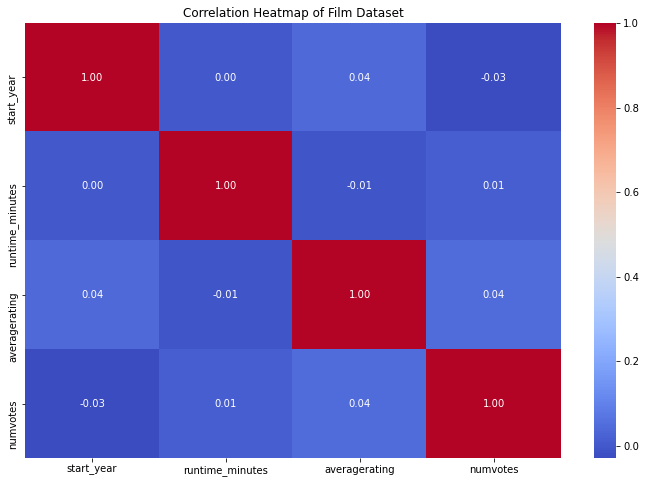

In [154]:
# Correlation heatmap for the film dataset
plt.figure(figsize=(12, 8))
sns.heatmap(film_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Film Dataset')
plt.show()


`sns.heatmap()`: This function is used to plot the correlation matrix, showing how different variables are correlated with each other.

`annot=True`: This annotates the heatmap with the correlation values for better clarity.

`cmap='coolwarm'`: The color map is set to 'coolwarm' to display positive correlations in warm colors and negative correlations in cool colors.

`fmt=".2f"`: This formats the annotations to show correlation values with two decimal points.

This heatmap allows us to quickly identify which variables are strongly or weakly correlated in the dataset.

From the above visual we are able to measure the strength and direction of the relationship between two variables as below:

1. **Weak Negative Correlation (r = -0.3 to 0):**
A correlation value between -0.3 and 0 suggests a weak negative relationship. As one variable increases, the other tends to decrease, but the relationship is not strong.

2. **No Correlation (r = 0):**
A correlation value of 0 means there is no linear relationship between the two variables. Changes in one variable do not predict changes in the other.

3. **Weak Positive Correlation (r = 0 to 0.3):**
A correlation value between 0 and 0.3 indicates a weak positive relationship. The variables may increase together, but the relationship is not strong.

4. **Moderate Positive Correlation (r = 0.3 to 0.7):**
A correlation value between 0.3 and 0.7 indicates a moderate positive relationship. The variables are related, but there may be some inconsistencies in how they move together.

5. **Perfect Positive Correlation (r = 1):**
A correlation value of 1 indicates a perfect positive relationship. As one variable increases, the other variable also increases proportionally.
    - In this context, however, a perfect correlation often appears when comparing a variable with itself, rather than showing the relationship between two different variables.

### **Top 20 Genres Produced**
To understand the broader landscape of the film industry, it's important to see which genres dominate production.

This visualization displays the top 20 most frequently produced genres, helping identify what types of movies have historically been most popular among filmmakers and studios.

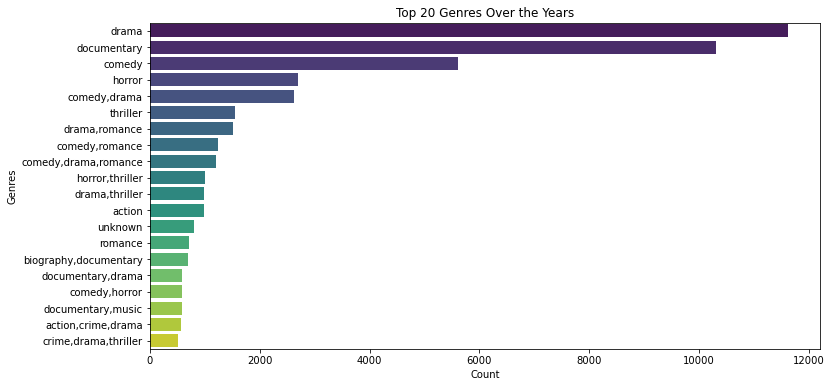

In [159]:
# Top 20 genres produced
plt.figure(figsize=(12, 6))
sns.countplot(data=film_df, y='genres', order=film_df['genres'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Genres Over the Years')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

**Interpretation**

The bar chart shows the top 20 most frequently produced film genres based on the dataset.
Key observations:

**A few genres dominate production:** The top two or three genres have significantly higher counts compared to the others, indicating a strong preference among filmmakers and studios for these genres.

**Sharp drop after top genres:** After the top few, the production frequency of genres quickly declines, suggesting that less popular genres are produced at much lower rates.

**Long tail:** There’s a long tail of genres with relatively similar, smaller production counts, showing the diversity of film types even though they are produced less frequently.

In short, while the industry heavily favors certain genres, there is still notable diversity in the kinds of films produced.

### **Top 10 Movies by Average Rating**

In this section, we identify the top 10 movies with the highest average ratings based on audience feedback.  
This helps highlight the most critically acclaimed films within the dataset, providing insight into what types of movies resonate best with audiences.

We use the `nlargest()` function to select the 10 movies with the highest `averagerating` values and display their titles alongside their ratings.


In [140]:
# Top 10 movies by average rating
top_10_movies_rating = film_df.nlargest(10, 'averagerating')[['primary_title', 'averagerating']]
print("Top 10 Movies by Average Rating:")
print(top_10_movies_rating)


Top 10 Movies by Average Rating:
                                        primary_title  averagerating
702    exteriores: mulheres brasileiras na diplomacia           10.0
878         the dark knight: the ballad of the n word           10.0
9745                             freeing bernie baran           10.0
27335                           hercule contre hermès           10.0
42970                           i was born yesterday!           10.0
49925                       dog days in the heartland           10.0
50085                                 revolution food           10.0
51109                 fly high: story of the disc dog           10.0
53408                                   all around us           10.0
53689             the paternal bond: barbary macaques           10.0


### **Top 10 Genres by Average Rating**

This analysis identifies the top 10 genres with the highest average movie ratings.  
By grouping the data by genre and calculating the mean average rating for each, we can uncover which genres consistently receive the best audience reception.

The results provide valuable insights into viewer preferences across different types of films.


In [141]:
# Top 10 genres by average rating
top_10_genres_rating = film_df.groupby('genres')['averagerating'].mean().nlargest(10).reset_index()
top_10_genres_rating.columns = ['Genres', 'Average Rating']
print("Top 10 Genres by Average Rating:")
print(top_10_genres_rating)

Top 10 Genres by Average Rating:
                        Genres  Average Rating
0   comedy,documentary,fantasy             9.4
1   documentary,family,musical             9.3
2                history,sport             9.2
3                    game-show             9.0
4                music,mystery             9.0
5      comedy,drama,reality-tv             8.8
6  documentary,news,reality-tv             8.8
7       documentary,news,sport             8.8
8            drama,fantasy,war             8.8
9                  drama,short             8.8


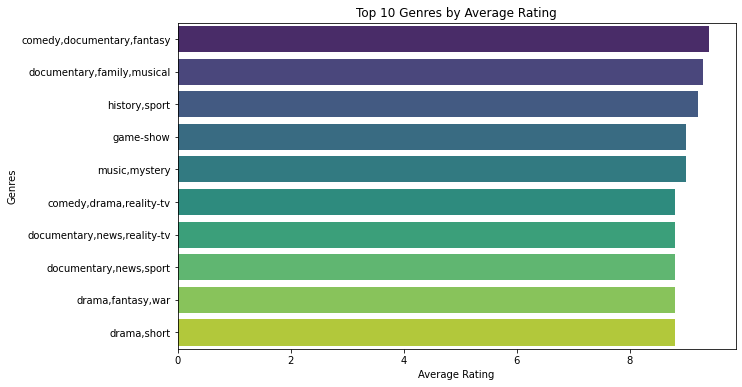

In [ ]:
# Plotting the top 10 genres by average rating
top_10_genres = film_df.groupby('genres')['averagerating'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='averagerating', y='genres', data=top_10_genres, palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

### **Top 10 Genres by Number of Votes**

This analysis highlights the top 10 movie genres that have received the highest average number of audience votes.  
By examining vote counts, we gain insight into which genres generate the most audience engagement and interest.

A higher number of votes often indicates greater popularity or broader viewership reach, making this a valuable metric for understanding genre appeal.


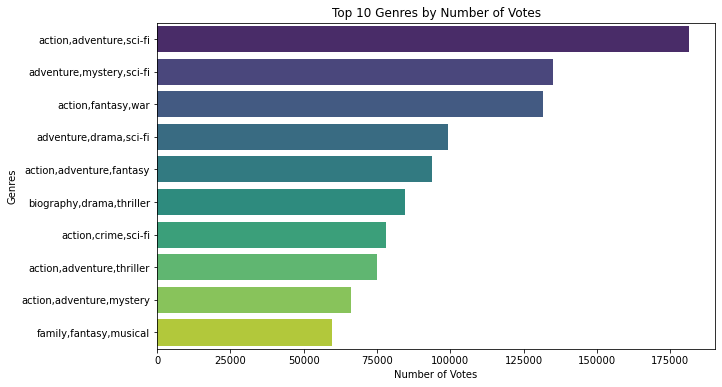

In [157]:
# Top 10 genres by votes
top_10_genres_votes = film_df.groupby('genres')['numvotes'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='numvotes', y='genres', data=top_10_genres_votes, palette='viridis')
plt.title('Top 10 Genres by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Genres')
plt.show()

**Key Insight:**

Genres that are more popular (more votes) likely have broader audience appeal, larger marketing budgets, or stronger fan bases.

These insights can help studios or investors prioritize certain genres when aiming for wide audience reach and impact.

### **Runtime vs Average Rating**

In this section, we explore the relationship between a movie's runtime and its average audience rating.  
Using a scatter plot, we visualize whether longer or shorter movies tend to receive higher ratings.

This analysis helps us investigate if film length influences audience satisfaction, offering insights into ideal runtime ranges for highly rated movies.


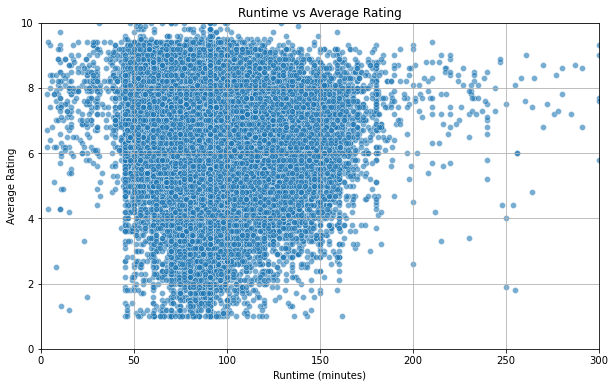

In [49]:
# runtime vs average rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=film_df, alpha=0.6)
plt.title('Runtime vs Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.xlim(0, 300)  # Limit x-axis to 0-300 minutes
plt.ylim(0, 10)  # Limit y-axis to 0-10 ratings
plt.grid(True)
plt.show()


**Interpretation:**

**Density:**

Most of the data points are densely packed between approximately 50 and 180 minutes for runtime, and ratings between 4 and 9.
    - This suggests that the majority of movies are around 1–3 hours long and tend to receive moderate to good ratings.

**Trend:**

There is no strong visible trend (no clear upward or downward line).
    - Runtime doesn't appear to strongly influence ratings: both short and long movies can perform similarly in terms of average rating.

**Outliers:**

There are a few very long movies (over 200 minutes) scattered across the full range of ratings (low to high).

Some extremely short movies (below 50 minutes) also appear, but they are fewer.

**Rating Range:**

Most ratings stay between 4 and 9, regardless of runtime.

***Summary Insight:***

While most popular movies are between 60–180 minutes long, there is no clear evidence that a longer or shorter runtime alone guarantees higher ratings.

Other factors like genre, cast, storytelling quality, and production values likely play a bigger role in influencing audience ratings.

### **Correlation Heatmap for the Box Office Dataset**

This section generates a **`correlation heatmap`** to visualize the relationships between various numerical variables in the box office dataset. 

It provides an easy way to spot trends and identify potential patterns.


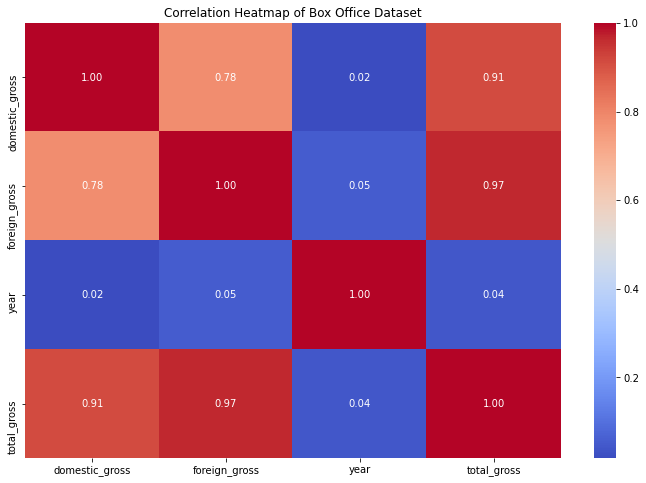

In [155]:
# Correlation heatmap for numerical features in box_office_df
plt.figure(figsize=(12, 8))
sns.heatmap(box_office_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Box Office Dataset')
plt.show()

`sns.heatmap()`: This function is used to plot the correlation matrix, showing how different variables are correlated with each other.

`annot=True`: This annotates the heatmap with the correlation values for better clarity.

`cmap='coolwarm'`: The color map is set to 'coolwarm' to display positive correlations in warm colors and negative correlations in cool colors.

`fmt=".2f"`: This formats the annotations to show correlation values with two decimal points.

From the above visual we are able to measure the strength and direction of the relationship between two variables as below:

1. **Perfect Positive Correlation (r = 1):**
A correlation value of 1 indicates a perfect positive relationship. As one variable increases, the other variable also increases proportionally.
    - In this context, however, a perfect correlation often appears when comparing a variable with itself, rather than showing the relationship between two different variables.


2. **Strong Positive Correlation (r = 0.7 to 1):**
A correlation value between 0.7 and 1 suggests a strong positive relationship. One variable increases as the other increases, but not perfectly.


3. **Weak Positive Correlation (r = 0 to 0.3):**
A correlation value between 0 and 0.3 indicates a weak positive relationship. The variables may increase together, but the relationship is not strong.




### **Movie Production and Rating Trends Over Time**

To better understand how the film industry has evolved, we will explore two key trends:
- **Number of Movies Released Per Year**: This plot shows how movie production has changed over time, highlighting periods of growth, decline, or stability in the industry.
- **Average Movie Rating Per Year**: This plot provides insights into how audience or critic ratings have varied over the years, revealing any patterns in film quality or reception across different periods.

Both visualizations help paint a broader picture of the historical trends in movie production and audience reception.


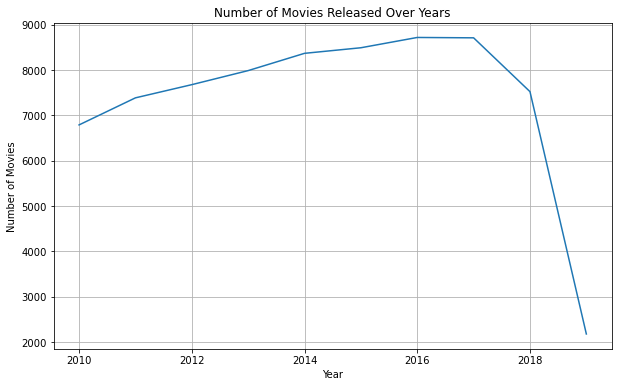

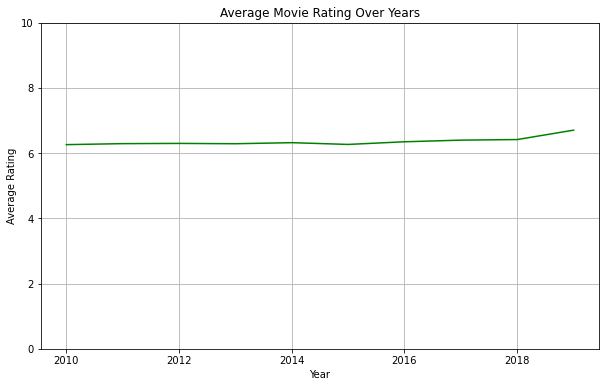

In [131]:
# Number of movies per year
movies_per_year = film_df['start_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# Average rating per year
avg_rating_per_year = film_df.groupby('start_year')['averagerating'].mean()

plt.figure(figsize=(10,6))
avg_rating_per_year.plot(kind='line', color='green')
plt.title('Average Movie Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(0,10)
plt.grid(True)
plt.show()


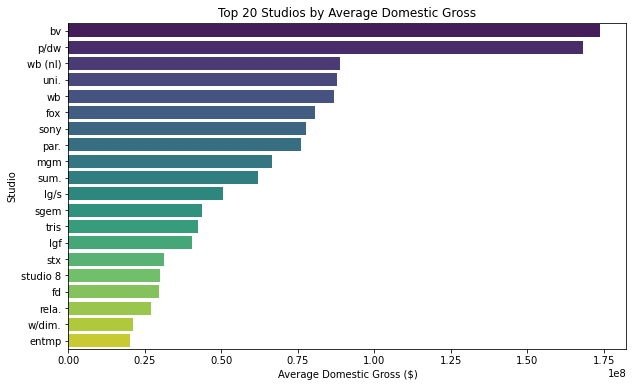

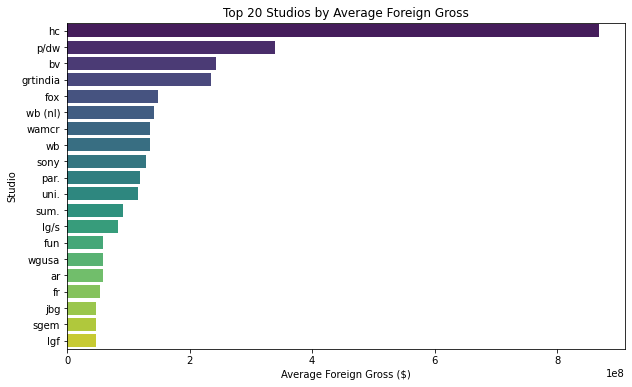

In [118]:
# Top 20 studios by average domestic gross
top_20_studios_domestic = box_office_df.groupby('studio')['domestic_gross'].mean().nlargest(20).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='domestic_gross', y='studio', data=top_20_studios_domestic, palette='viridis')
plt.title('Top 20 Studios by Average Domestic Gross')
plt.xlabel('Average Domestic Gross ($)')
plt.ylabel('Studio')
plt.show()

# Top 20 studios by average foreign gross
top_20_studios_foreign = box_office_df.groupby('studio')['foreign_gross'].mean().nlargest(20).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='foreign_gross', y='studio', data=top_20_studios_foreign, palette='viridis')
plt.title('Top 20 Studios by Average Foreign Gross')
plt.xlabel('Average Foreign Gross ($)')
plt.ylabel('Studio')
plt.show()



In [65]:
# Create a new column: total_gross
box_office_df['total_gross'] = box_office_df['domestic_gross'] + box_office_df['foreign_gross']
# Check the first few rows to confirm the new column
print(box_office_df[['title', 'total_gross']].head())


                                               title   total_gross
0                                 toy story 3 (2010)  1.067000e+09
1                  alice in wonderland (2010) (2010)  1.025500e+09
2  harry potter and the deathly hallows part 1 (2...  9.603000e+08
3                                   inception (2010)  8.283000e+08
4                         shrek forever after (2010)  7.526000e+08


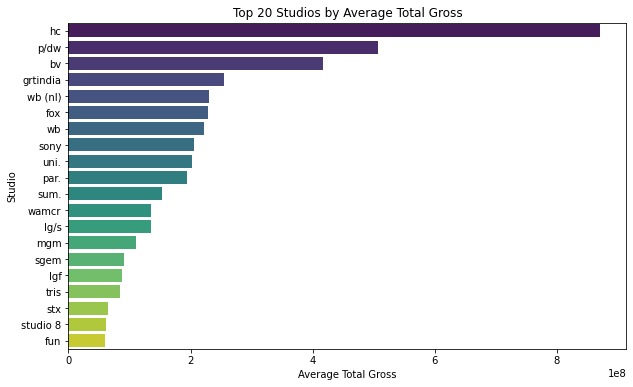

In [119]:
# Top 10 studios by average total gross
top_20_studios = box_office_df.groupby('studio')['total_gross'].mean().nlargest(20).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='total_gross', y='studio', data=top_20_studios, palette='viridis')
plt.title('Top 20 Studios by Average Total Gross')
plt.xlabel('Average Total Gross')
plt.ylabel('Studio')
plt.show()


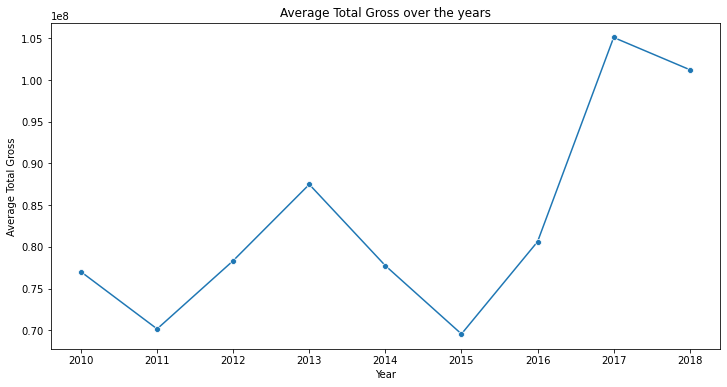

In [ ]:
# Yearly revenue trends
# Group by year and calculate the mean total gross
years = box_office_df.groupby('year')['total_gross'].mean().reset_index()

# Plotting the average total gross over the years
plt.figure(figsize=(12,6))
sns.lineplot(y='total_gross', x='year', data=years, marker='o', palette='viridis')
plt.title('Average Total Gross over the years')
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.show()

In [ ]:
# Year with the Highest Average Total Gross

# Group by 'year' and calculate the mean total_gross for each year
average_gross_per_year = box_office_df.groupby('year')['total_gross'].mean()

# Find the year with the highest average total gross
highest_avg_gross_year = average_gross_per_year.idxmax()
highest_avg_gross_value = average_gross_per_year.max()

# Print the result
print(f"The year with the highest average total gross is {highest_avg_gross_year} with an average gross of ${highest_avg_gross_value:,.2f}.")


The year with the highest average total gross is 2017 with an average gross of $105,113,747.52.


In [ ]:
# Genre with the highest production count in 2017
genre_2017 = film_df[film_df['start_year'] == 2017]['genres'].value_counts().idxmax()
print(f"The genre with the highest number of movies produced in 2017 is: {genre_2017}")

# Genre with the highest average rating in 2017
genre_2017_avg_rating = film_df[film_df['start_year'] == 2017].groupby('genres')['averagerating'].mean().idxmax()
print(f"The genre with the highest average rating in 2017 is: {genre_2017_avg_rating}")

The genre with the highest number of movies produced in 2017 is: documentary
The genre with the highest average rating in 2017 is: documentary,musical


In [142]:
# Highest grossing movies by studio
highest_grossing_movies_studio = box_office_df.nlargest(10, 'total_gross')[['studio', 'title', 'total_gross']]
print("Top 10 Highest Grossing Movies by Studio:")
print(highest_grossing_movies_studio)



Top 10 Highest Grossing Movies by Studio:
     studio                                              title   total_gross
718      bv                       marvel's the avengers (2012)  1.518900e+09
1849     bv                     avengers: age of ultron (2015)  1.405400e+09
3049     bv                               black panther (2018)  1.347000e+09
322      wb  harry potter and the deathly hallows part 2 (2...  1.341500e+09
2728     bv                    star wars: the last jedi (2017)  1.332600e+09
3050   uni.              jurassic world: fallen kingdom (2018)  1.309500e+09
1111     bv                                      frozen (2013)  1.276400e+09
2729     bv                 beauty and the beast (2017) (2017)  1.263500e+09
3051     bv                               incredibles 2 (2018)  1.242800e+09
1112     bv                                  iron man 3 (2013)  1.214800e+09


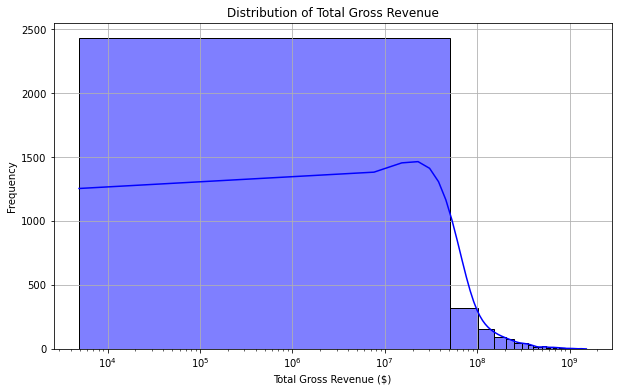

In [143]:
# Revenue distribution
plt.figure(figsize=(10,6))
sns.histplot(box_office_df['total_gross'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Gross Revenue')
plt.xlabel('Total Gross Revenue ($)')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale for better visualization of skewed data
plt.grid(True)
plt.show()